In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
from torchvision import datasets, transforms

# import local packages
from utils import data_utils, training_utils
from utils.training_utils import train_model, test_model
from models.dense_convtranspose1d import DenseConvTranspose1D

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Looping to generate data and training

**************************** ROUND 1 ****************************
Freq truncate.
freq.shape: (222,)
N_possible: [100, 100] , 10000 in total
N_needed: 15
Sample points number available, continue calculating...
[ 1 / 15 ] [D1, D2] = [98. 94.]
Calculation Progress: 100%
FILE SAVED, [D1,D2] = [98. 94.]
----------------
[ 2 / 15 ] [D1, D2] = [129. 146.]
Calculation Progress: 100%
FILE SAVED, [D1,D2] = [129. 146.]
----------------
[ 3 / 15 ] [D1, D2] = [ 59. 130.]
Calculation Progress: 100%
FILE SAVED, [D1,D2] = [ 59. 130.]
----------------
[ 4 / 15 ] [D1, D2] = [141.  72.]
Calculation Progress: 100%
FILE SAVED, [D1,D2] = [141.  72.]
----------------
[ 5 / 15 ] [D1, D2] = [59. 73.]
Calculation Progress: 100%
FILE SAVED, [D1,D2] = [59. 73.]
----------------
[ 6 / 15 ] [D1, D2] = [110. 121.]
Calculation Progress: 100%
FILE SAVED, [D1,D2] = [110. 121.]
----------------
[ 7 / 15 ] [D1, D2] = [100. 119.]
Calculation Progress: 100%
FILE SAVED, [D1,D2] = [100. 119.]
----------------
[ 8 / 15 ] [D1,

----------------------------------------------------------------------
*** EPOCH 41 || AVG LOSS 0.00011331606244008678
### TEST LOSS  6.684232212137431e-05
----------------------------------------------------------------------
*** EPOCH 42 || AVG LOSS 0.00013921234482647076
### TEST LOSS  6.795901354053057e-05
----------------------------------------------------------------------
*** EPOCH 43 || AVG LOSS 0.00010872027536000436
### TEST LOSS  5.305119921104051e-05
----------------------------------------------------------------------
*** EPOCH 44 || AVG LOSS 8.34714476998973e-05
### TEST LOSS  4.374676773295505e-05
----------------------------------------------------------------------
*** EPOCH 45 || AVG LOSS 7.550593533475572e-05
### TEST LOSS  4.349528826423921e-05
----------------------------------------------------------------------
*** EPOCH 46 || AVG LOSS 8.429606587014859e-05
### TEST LOSS  4.0701548641663976e-05
-------------------------------------------------------------------

----------------------------------------------------------------------
*** EPOCH 95 || AVG LOSS 8.632235785626108e-05
### TEST LOSS  3.781361137953354e-05
----------------------------------------------------------------------
*** EPOCH 96 || AVG LOSS 4.18140340722554e-05
### TEST LOSS  3.3893410363816653e-05
----------------------------------------------------------------------
*** EPOCH 97 || AVG LOSS 4.4150974038833134e-05
### TEST LOSS  4.74643102279515e-05
----------------------------------------------------------------------
*** EPOCH 98 || AVG LOSS 7.974550550594964e-05
### TEST LOSS  2.516949225537246e-05
----------------------------------------------------------------------
*** EPOCH 99 || AVG LOSS 8.379093984937451e-05
### TEST LOSS  0.00018075946827593724
----------------------------------------------------------------------
*** EPOCH 100 || AVG LOSS 0.00010308759616843115
### TEST LOSS  4.954381292918697e-05
-------------------------------------------------------------------

----------------------------------------------------------------------
*** EPOCH 148 || AVG LOSS 0.00010106727640959434
### TEST LOSS  5.332007131073624e-05
----------------------------------------------------------------------
*** EPOCH 149 || AVG LOSS 5.949293451218788e-05
### TEST LOSS  1.778177283995319e-05
----------------------------------------------------------------------
*** EPOCH 150 || AVG LOSS 3.837283067393097e-05
### TEST LOSS  2.1311680211510974e-05
----------------------------------------------------------------------
*** EPOCH 151 || AVG LOSS 2.0305542163138548e-05
### TEST LOSS  1.9508480363583658e-05
----------------------------------------------------------------------
*** EPOCH 152 || AVG LOSS 3.0365470835628608e-05
### TEST LOSS  3.2745197313488464e-05
----------------------------------------------------------------------
*** EPOCH 153 || AVG LOSS 7.375553605015739e-05
### TEST LOSS  4.82346677017631e-05
-----------------------------------------------------------

----------------------------------------------------------------------
*** EPOCH 201 || AVG LOSS 5.347264440539826e-06
### TEST LOSS  5.35533768015739e-06
----------------------------------------------------------------------
*** EPOCH 202 || AVG LOSS 6.540224861358486e-06
### TEST LOSS  5.500431734617451e-06
----------------------------------------------------------------------
*** EPOCH 203 || AVG LOSS 5.099396537389111e-06
### TEST LOSS  5.2825256261712635e-06
----------------------------------------------------------------------
*** EPOCH 204 || AVG LOSS 7.541530173208836e-06
### TEST LOSS  4.683431734520127e-06
----------------------------------------------------------------------
*** EPOCH 205 || AVG LOSS 6.471864617196843e-06
### TEST LOSS  5.140549478710454e-06
----------------------------------------------------------------------
*** EPOCH 206 || AVG LOSS 1.0716847562738015e-05
### TEST LOSS  8.719156608094635e-06
---------------------------------------------------------------

----------------------------------------------------------------------
*** EPOCH 254 || AVG LOSS 9.119407896681272e-06
### TEST LOSS  4.488217268772132e-06
----------------------------------------------------------------------
*** EPOCH 255 || AVG LOSS 5.715130468312661e-06
### TEST LOSS  7.032058783806861e-06
----------------------------------------------------------------------
*** EPOCH 256 || AVG LOSS 5.761970862749877e-06
### TEST LOSS  2.6530861759965775e-06
----------------------------------------------------------------------
*** EPOCH 257 || AVG LOSS 2.7061638718350876e-06
### TEST LOSS  4.78844476674567e-06
----------------------------------------------------------------------
*** EPOCH 258 || AVG LOSS 4.405963570282741e-06
### TEST LOSS  3.6354521398607175e-06
----------------------------------------------------------------------
*** EPOCH 259 || AVG LOSS 5.201779841475703e-06
### TEST LOSS  9.391856838192326e-06
--------------------------------------------------------------

----------------------------------------------------------------------
*** EPOCH 308 || AVG LOSS 6.522285457322141e-06
### TEST LOSS  3.585487229429418e-06
----------------------------------------------------------------------
*** EPOCH 309 || AVG LOSS 6.257548155493471e-06
### TEST LOSS  5.405873116615112e-06
----------------------------------------------------------------------
*** EPOCH 310 || AVG LOSS 1.040754498262686e-05
### TEST LOSS  9.229330316884443e-06
----------------------------------------------------------------------
*** EPOCH 311 || AVG LOSS 7.714298681094078e-06
### TEST LOSS  4.773207547259517e-06
----------------------------------------------------------------------
*** EPOCH 312 || AVG LOSS 4.8148439267000265e-06
### TEST LOSS  2.9796692388117663e-06
----------------------------------------------------------------------
*** EPOCH 313 || AVG LOSS 3.873824505262747e-06
### TEST LOSS  4.929732813252485e-06
--------------------------------------------------------------

----------------------------------------------------------------------
*** EPOCH 362 || AVG LOSS 3.7518358188511533e-06
### TEST LOSS  1.7413571526958549e-06
----------------------------------------------------------------------
*** EPOCH 363 || AVG LOSS 2.71309326459838e-06
### TEST LOSS  1.8033849300991278e-06
----------------------------------------------------------------------
*** EPOCH 364 || AVG LOSS 2.723482012356726e-06
### TEST LOSS  1.6450054431516037e-06
----------------------------------------------------------------------
*** EPOCH 365 || AVG LOSS 5.937931316187436e-06
### TEST LOSS  5.007318918615056e-06
----------------------------------------------------------------------
*** EPOCH 366 || AVG LOSS 2.4242958791849863e-06
### TEST LOSS  1.8177239326178097e-06
----------------------------------------------------------------------
*** EPOCH 367 || AVG LOSS 5.2174577641987225e-06
### TEST LOSS  2.2401646219805114e-06
---------------------------------------------------------

----------------------------------------------------------------------
*** EPOCH 415 || AVG LOSS 2.4023862692956756e-06
### TEST LOSS  1.494770094723208e-06
----------------------------------------------------------------------
*** EPOCH 416 || AVG LOSS 1.8474521013445155e-06
### TEST LOSS  1.1828471542685292e-06
----------------------------------------------------------------------
*** EPOCH 417 || AVG LOSS 2.6680525631187874e-06
### TEST LOSS  4.397154543767101e-06
----------------------------------------------------------------------
*** EPOCH 418 || AVG LOSS 5.469481362752049e-06
### TEST LOSS  4.891589924227446e-06
----------------------------------------------------------------------
*** EPOCH 419 || AVG LOSS 3.748887013443891e-06
### TEST LOSS  1.5686061487940605e-06
----------------------------------------------------------------------
*** EPOCH 420 || AVG LOSS 1.5935154048444625e-06
### TEST LOSS  1.536776176180865e-06
----------------------------------------------------------

----------------------------------------------------------------------
*** EPOCH 469 || AVG LOSS 2.550224212427565e-06
### TEST LOSS  1.1753670150937978e-06
----------------------------------------------------------------------
*** EPOCH 470 || AVG LOSS 1.832909376275893e-06
### TEST LOSS  9.251523238162918e-07
----------------------------------------------------------------------
*** EPOCH 471 || AVG LOSS 1.6326817814160676e-06
### TEST LOSS  2.796283069983474e-06
----------------------------------------------------------------------
*** EPOCH 472 || AVG LOSS 3.7158012162308294e-06
### TEST LOSS  1.5179212482507864e-06
----------------------------------------------------------------------
*** EPOCH 473 || AVG LOSS 9.917997738284612e-06
### TEST LOSS  4.64887302769057e-06
----------------------------------------------------------------------
*** EPOCH 474 || AVG LOSS 1.3816162231705676e-05
### TEST LOSS  2.070519003609661e-05
------------------------------------------------------------

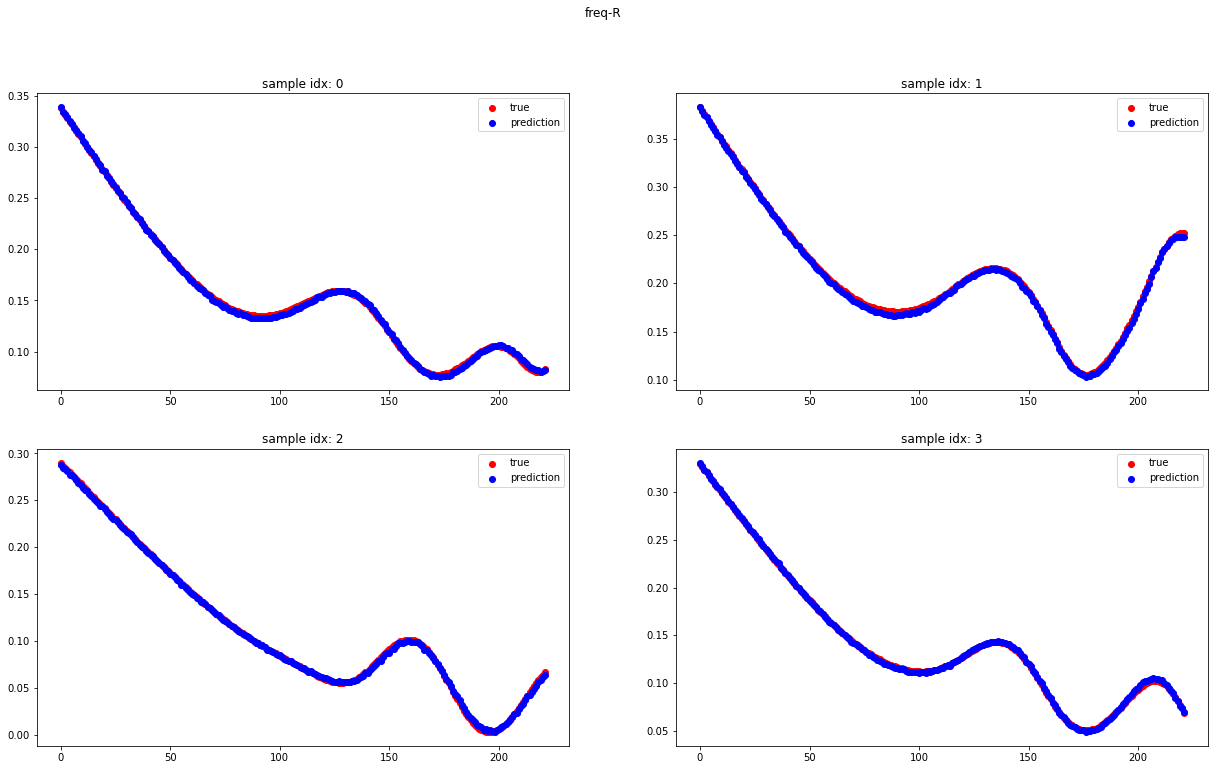

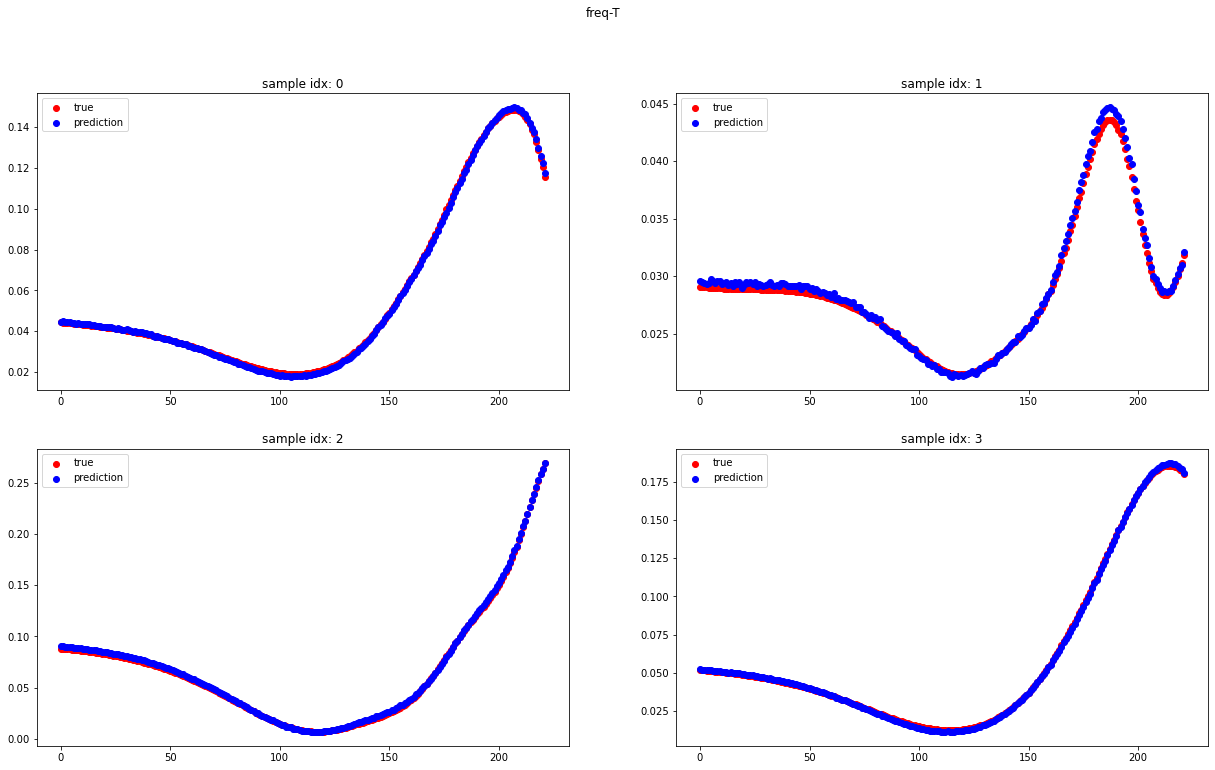

**************************** ROUND 2 ****************************
Freq truncate.
freq.shape: (222,)
N_possible: [100, 100] , 10000 in total
N_needed: 30
Sample points number available, continue calculating...
[ 1 / 15 ] [D1, D2] = [68. 60.]
Calculation Progress: 29%

KeyboardInterrupt: 

In [3]:
loss_tolerance = 1e-3
loss = loss_tolerance+1  # start from a loss that bigger than tolerance
ROUND = 1  # round number for simulation and training


# ====== RCWA simulation prepare ======
# params range, [D1, D2]
params_range = [[50,150], [50,150]]
params_decimal = [0,0]
path_material_name = 'absorber'

# solver setting: [freq_step, freq_truncate, params_mesh, PQ_order, source, device]
'''
solver setting should not being changed while sampling and training!
'''
params_mesh = [512, 512]
order = 9  # RCWA accuracy, higher to be more accurate
PQ_order = [order, order]
ginc = [0, 0, 1]  # orig [0,0,1], incident source
EP = [0, 1, 0]  # orig [0,1,0]
source = [ginc, EP]
device_rcwa = 'gpu'
freq_step = 4  # freq step size, bigger to save more time, while less sampling freq points
freq_truncate = 1.7  # 'none' to no truncate
solver_setting = [freq_step, freq_truncate, params_mesh, PQ_order, source, device_rcwa]

plt.ion()  # interactive plt while looping
while loss>loss_tolerance:
    print('**************************** ROUND', ROUND, '****************************')
    # ====== generate simulation ======
    num_data = 15
    if ROUND==1:
        import_list = False
    else:
        import_list = True
    params_list, R, T = data_utils.generate_data_absorber(num_data, params_range, params_decimal, solver_setting_list=solver_setting,
                                           path_material_name=path_material_name, import_list=import_list, use_log=True)
    print('params_list.shape:', params_list.shape)
    print('R.shape:', R.shape)
    print('T.shape:', T.shape)
    
    # save all data
    path_all_data_round = './data/' + path_material_name + '/all_data_' + path_material_name + '_ROUND_' + str(ROUND) + '.npz'
    np.savez(path_all_data_round, params_list=params_list, R=R, T=T)
    print('** Round data saved.')
    
    # generate all data stacked for all rounds
    if ROUND==1:
        params_list_all = params_list
        R_all = R
        T_all = T
    else:
        params_list_all = np.concatenate((params_list_all, params_list), axis=0)
        R_all = np.concatenate((R_all, R), axis=0)
        T_all = np.concatenate((T_all, T), axis=0)
    print('params_list_all.shape:', params_list_all.shape)
    print('R_all.shape:', R_all.shape)
    print('T_all.shape:', T_all.shape)
    path_all_data = './data/' + path_material_name + '/all_data_' + path_material_name + '.npz'
    np.savez(path_all_data, params_list=params_list_all, R=R_all, T=T_all)
    print('** All Rounds data saved.')
    
    
    # ====== train model with simulation data ======
    # prepare dataset
    dataset, dataloader = data_utils.generate_dataset_absorber(path_all_data, idx_pick_param=[], BTSZ=1)
    len_train = int((len(dataset)*0.7)//1)
    len_test = len(dataset)-len_train
    dataset_train, dataset_test = random_split(dataset, [len_train, len_test])
    print('LEN dataset_train:', len(dataset_train))
    print('LEN dataset_test:', len(dataset_test))
    BTSZ = 1
    dataloader_train = DataLoader(dataset_train, batch_size=BTSZ, shuffle=True)
    dataloader_test = DataLoader(dataset_test, batch_size=BTSZ, shuffle=True)
    print('LEN dataloader_train:', len(dataloader_train))
    print('LEN dataloader_test:', len(dataloader_test))
    
    # import network
    dim_in = params_list_all.shape[-1] + 2  # N_param
    dim_out = R_all.shape[-1]  # N_freq
    net_dense = DenseConvTranspose1D(dim_in,dim_out)
    net_dense = net_dense.to(device)
    
    # train network
    learning_rate = 1e-3
    optimizer = torch.optim.Adam(net_dense.parameters(), lr=learning_rate, weight_decay=0.0, amsgrad=True)
    criteon = nn.MSELoss()
    scheduler = None
    loss_train, loss_test = training_utils.train_model(dataloader, dataloader_test, optimizer, criteon, net_dense, device, NUM_EPOCH=500, scheduler=scheduler)
    print('** loss_train', loss_train)
    print('** loss_test', loss_test)
    
    # visualize spectra on test set
    for idx, data in enumerate(dataloader_test):
        if idx>=4:
            break
        X, y = data
        y_test = y
        X = X.to(device)
        y = y.to(device)
        y_pred = net_dense(X)

        y_np = y_test.cpu().detach().numpy()
        y_pred_np = y_pred.cpu().detach().numpy()
        if idx==0:
            y_test_np = y_np
            y_test_pred_np = y_pred_np
        else:
            y_test_np = np.concatenate((y_test_np,y_np), axis=0)
            y_test_pred_np = np.concatenate((y_test_pred_np,y_pred_np), axis=0)
    print('y_test_np.shape:', y_test_np.shape)
    print('y_test_pred_np.shape:', y_test_pred_np.shape)

    fig1 = plt.figure(1, figsize=(21,12))
    fig1.suptitle('freq-R')
    for idx_fig in range(4):
        plt.subplot(2, 2, idx_fig+1)
        plt.scatter(np.arange(y_test_np.shape[2]), y_test_np[idx_fig,0,:], c='r')
        plt.scatter(np.arange(y_test_pred_np.shape[2]), y_test_pred_np[idx_fig,0,:], c='b')
        plt.legend(('true', 'prediction'))
        plt.title('sample idx: '+str(idx_fig))


    fig2 = plt.figure(2, figsize=(21,12))
    fig2.suptitle('freq-T')
    for idx_fig in range(4):
        plt.subplot(2, 2, idx_fig+1)
        plt.scatter(np.arange(y_test_np.shape[2]), y_test_np[idx_fig,1,:], c='r')
        plt.scatter(np.arange(y_test_pred_np.shape[2]), y_test_pred_np[idx_fig,1,:], c='b')
        plt.legend(('true', 'prediction'))
        plt.title('sample idx: '+str(idx_fig))
    plt.show()
    
    # ====== test model on a separate simulation data ======
    
    
    
    if ROUND>3:
        loss = 1e-7
    ROUND += 1
    
plt.ioff()